### Python Libraries

In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset - Youtube Global Statistics

In [289]:
youtube_df = pd.read_csv("Global YouTube Statistics.csv", encoding='iso-8859-1')

In [290]:
# 995 rows, 28 columns (uncleaned)
youtube_df.shape

(995, 28)

In [291]:
# get names of each column
for i, col in enumerate(youtube_df.columns):
    print(i, col)

0 rank
1 Youtuber
2 subscribers
3 video views
4 category
5 Title
6 uploads
7 Country
8 Abbreviation
9 channel_type
10 video_views_rank
11 country_rank
12 channel_type_rank
13 video_views_for_the_last_30_days
14 lowest_monthly_earnings
15 highest_monthly_earnings
16 lowest_yearly_earnings
17 highest_yearly_earnings
18 subscribers_for_last_30_days
19 created_year
20 created_month
21 created_date
22 Gross tertiary education enrollment (%)
23 Population
24 Unemployment rate
25 Urban_population
26 Latitude
27 Longitude


# **EXPLORATORY DATA ANALYSIS**

1. Sample EDA Question?

    **Description**:

    **Variables**: `zzz` and `zzz`

    **Numerical Summary**: 

    **Visualization**: 

#### ***SUCCESS METRICS AND CORRELATIONS***

1. What are the highest earning categories?

    **Description**: aims to identify and explore YouTube categories that yield the highest earnings

    **Variables**: `category` and `highest_monthly_earnings`

    


**Numerical Summary**: calculate mean for `highest_monthly_earnings` within each `category`

    Calculate mean by grouping the data by 'category'

In [292]:
summary_mean = youtube_df.groupby('category')['highest_monthly_earnings'].mean()

**Visualization**: create a bar chart and/or box plot to visualize highest earning `category`, showing how they compare to one another

    Create a bar chart to visualize the highest earning categories

In [293]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")


<Figure size 1200x600 with 0 Axes>

    Sort the categories by mean earnings in descending order

In [294]:
sorted_categories = summary_mean.sort_values(ascending=False).index

    Plot the bar chart


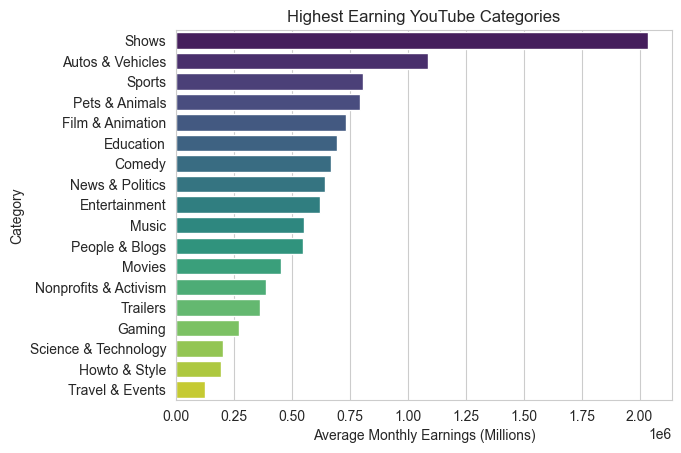

In [295]:
sns.barplot(x=summary_mean, y=summary_mean.index, order=sorted_categories, palette='viridis')
plt.xlabel('Average Monthly Earnings (Millions)')
plt.ylabel('Category')
plt.title('Highest Earning YouTube Categories')
plt.show()


#### ***CATEGORIES AND ORIGIN***

5. What are the most prevalent YouTube channel categories in the dataset?

    **Description**:
    - How many channels are in each category?
    - Is there a correlation between category and success?


    **Variables**: `category`

    **Numerical Summary**: 
    - Count the frequency of each unique category.

    **Visualization**: 
    - Create a bar chart to visualize the distribution of channels across `category`.

6. **What is the distribution of YouTube channels by their country of origin? Retrieve the top 15 countries.***
    
    **Description**:
    - aims to identify the top 15 countries with most amount of channels.

    **Variables**: `Country`

**Numerical Summary**

     Count the frequency of channels from each `country`.

In [296]:
# count frequency of channels from each country
country_counts = youtube_df['Country'].value_counts()

**Visualization**

    Create a bar chart or a choropleth map to visualize the distribution of YouTube channels by `country`.

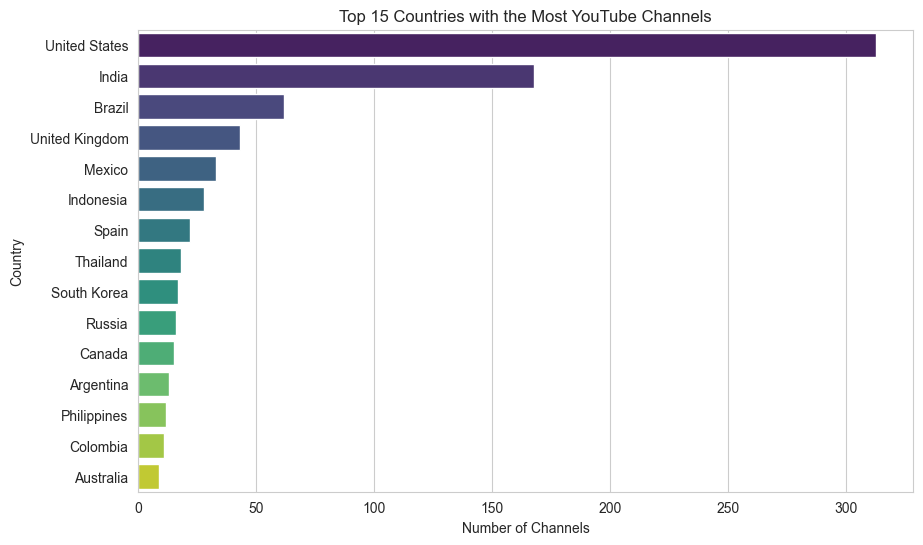

In [297]:
# Count the frequency of channels from each country
country_counts = youtube_df['Country'].value_counts()

# Choose the top N countries to display (e.g., top 10)
top_n = 15
top_countries = country_counts.head(top_n)

# Create a horizontal bar chart to visualize the frequency of channels from each country
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.xlabel('Number of Channels')
plt.ylabel('Country')
plt.title(f'Top {top_n} Countries with the Most YouTube Channels')
plt.show()


#### ***TIME AND CHANNEL CREATIONS***

7. **What is the relationship between the year a YouTube channel was created and its success metrics?**
    
    **Description**:
    - Do older channels tend to have more subscribers and views?
    - Are newer channels catching up quickly?


    **Variables**:
    - `created_year`
    - `subscribers`
    - `video views`
    - `highest_yearly_earnings`

**Numerical Summary**

    Calculate summary statistics (mean, median, etc.) for subscribers and views by the year of channel creation.


**Visualization**
    
    Create line charts or scatterplots to visualize the trends in subscribers and views over the years, possibly using different lines/markers for older and newer channels.


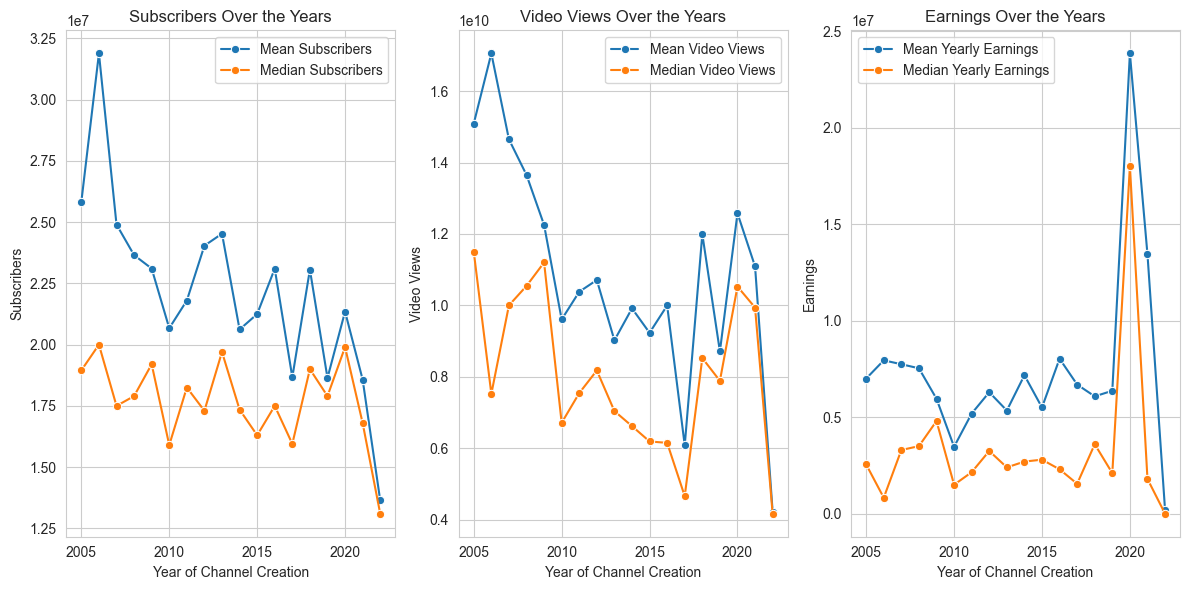

In [298]:

# Filter data for channels created from 2000s to the latest year
filtered_df = youtube_df[youtube_df['created_year'] >= 2000]

# Calculate summary statistics for subscribers and views by the year of channel creation
summary_stats = filtered_df.groupby('created_year')[['subscribers', 'video views', 'highest_yearly_earnings']].agg(['mean', 'median']).reset_index()

# Create line charts to visualize the trends in subscribers and views over the years
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Line chart for mean subscribers over the years
plt.subplot(1, 3, 1)
sns.lineplot(x='created_year', y=('subscribers', 'mean'), data=summary_stats, label='Mean Subscribers', marker='o')
sns.lineplot(x='created_year', y=('subscribers', 'median'), data=summary_stats, label='Median Subscribers', marker='o')
plt.xlabel('Year of Channel Creation')
plt.ylabel('Subscribers')
plt.title('Subscribers Over the Years')
plt.legend()

# Line chart for mean views over the years
plt.subplot(1, 3, 2)
sns.lineplot(x='created_year', y=('video views', 'mean'), data=summary_stats, label='Mean Video Views', marker='o')
sns.lineplot(x='created_year', y=('video views', 'median'), data=summary_stats, label='Median Video Views', marker='o')
plt.xlabel('Year of Channel Creation')
plt.ylabel('Video Views')
plt.title('Video Views Over the Years')
plt.legend()

# Line chart for mean earnings over the years
plt.subplot(1, 3, 3) 
sns.lineplot(x='created_year', y=('highest_yearly_earnings', 'mean'), data=summary_stats, label='Mean Yearly Earnings', marker='o')
sns.lineplot(x='created_year', y=('highest_yearly_earnings', 'median'), data=summary_stats, label='Median Yearly Earnings', marker='o')
plt.xlabel('Year of Channel Creation')
plt.ylabel('Earnings')
plt.title('Earnings Over the Years')
plt.legend()

plt.tight_layout()
plt.show()

#### ***TYPE OF CHANNEL AND SUCCESS***